# K Nearest Neighbor

<br />
<br />
<br />

### Table of Contents

* Introduction
* Loading Dataset
* K Nearest Neighbors

(Ended at using a scaled model)

(Need to construct pipeline)

(Need to eliminate sparse variables - dummies)

This draws from:
* <u>Introduction to Machine Learning with Python</u> (Andreas C. Müller, Sarah Guido, O'Reilly Press 2016).

<br />
<br />
<br />

## Introduction

We'll explore the use of the K-nearest neighbor machine learning algorithm, an extremely simple machine learning algorithm, to fit our data, assess how well it performs, and compare its performance to other machine learning algorithms.

In [1]:
%matplotlib inline

# numbers, stats, plots
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

# sklearn support
from sklearn import metrics, cross_validation, preprocessing
from sklearn.datasets.base import Bunch
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ShuffleSplit, StratifiedKFold

# machine learning algorithm of interest
from sklearn.neighbors import KNeighborsClassifier

#import pickle

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Loading Dataset

Start by loading the dataset into a scikit learn `Bundle` object:

In [2]:
def load_data():
    
    # Load the data from this file
    data_file = 'abalone/Dataset.data'
    
    # x data labels
    xnlabs = ['Sex']
    xqlabs = ['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']
    xlabs = xnlabs + xqlabs

    # y data labels
    ylabs = ['Rings']

    # Load data to dataframe
    df = pd.read_csv(data_file, header=None, sep=' ', names=xlabs+ylabs)
    
    # Filter zero values of height/length/diameter
    df = df[df['Height']>0.0]
    df = df[df['Length']>0.0]
    df = df[df['Diameter']>0.0]
    
    df['Volume'] = df['Height']*df['Length']*df['Diameter']
    xqlabs.append('Volume')
    
    dummies = pd.get_dummies(df[xnlabs], prefix='Sex')
    
    dfdummies = df[xqlabs+ylabs].join(dummies)
    
    xqlabs = xqlabs + dummies.columns.tolist()
    
    return Bunch(data   = dfdummies[xqlabs],
                 target = df[ylabs],
                 feature_names = xqlabs,
                 target_names  = ylabs)


In [3]:
# Load the dataset
dataset = load_data()
X = dataset.data
y = dataset.target

In [4]:
print X.head()
print "-"*20
print y.head()

   Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight    Volume  Sex_F  Sex_I  Sex_M  
0         0.150  0.015777    0.0    0.0    1.0  
1         0.070  0.008348    0.0    0.0    1.0  
2         0.210  0.030051    1.0    0.0    0.0  
3         0.155  0.020075    0.0    0.0    1.0  
4         0.055  0.006732    0.0    1.0    0.0  
--------------------
   Rings
0     15
1      7
2      9
3     10
4      7


In [5]:
# Split  into a training set and a test set
X_train, X_test, y_train, y_test = \
                    cross_validation.train_test_split(X, y, test_size=0.2)

## K Nearest Neighbors

We have loaded the data, and split it into a test set and a training set. Now we're ready to run the k-nearest neighbors algorithm on the result. (Note: once we've worked out the details, we'll create a pipeline to standardize and cross-validate.) Start with a k-nearest neighbors classifier model:

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
def make_spiffy(y):
    # Turns an (N,1) array into an (N,) array (???)
    return y.values.reshape(len(y.values))

knc = KNeighborsClassifier(n_neighbors=10)
knc.fit(X_train, make_spiffy(y_train))

print knc

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')


In [8]:
# Make predictions
yhat_test = knc.predict(X_test)

In [9]:
# This is not usually a good way to assess categorical models,
# but in this case, we're guessing age, so the categories are quantitative.
print knc.score(X_test,y_test)

0.240718562874


In [10]:
## Yikes. This model may not be worth saving.
#with open('logistic_regression.pickle', 'w') as f:
#    pickle.dump(model, f)

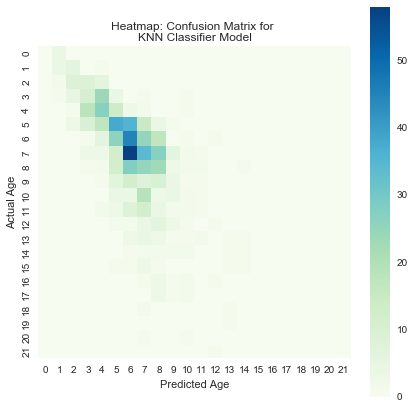

In [11]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
sns.heatmap(metrics.confusion_matrix(y_test, yhat_test),
           cmap="GnBu", square=True, ax=ax)
ax.set_title('Heatmap: Confusion Matrix for \nKNN Classifier Model')
ax.set_xlabel('Predicted Age')
ax.set_ylabel('Actual Age')
plt.show()

In [12]:
#print metrics.confusion_matrix(y_test, yhat_test)

In [13]:
print metrics.classification_report(y_test, yhat_test)

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         4
          4       0.36      0.36      0.36        11
          5       0.38      0.35      0.36        26
          6       0.21      0.23      0.22        47
          7       0.30      0.41      0.35        66
          8       0.31      0.31      0.31       124
          9       0.22      0.37      0.28       122
         10       0.22      0.23      0.22       146
         11       0.22      0.23      0.22        99
         12       0.14      0.09      0.11        44
         13       0.10      0.05      0.07        37
         14       0.12      0.03      0.05        34
         15       0.25      0.05      0.09        19
         16       0.20      0.06      0.10        16
         17       0.25      0.09      0.13        11
         18       0.00      0.00      0.00         8
         19       0.00      0.00      0.00         8
         20       0.00      0.00      0.00   

/usr/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [14]:
resid = make_spiffy(y_test) - yhat_test

print np.mean(resid)
print np.std(resid)

0.936526946108
2.4332122944


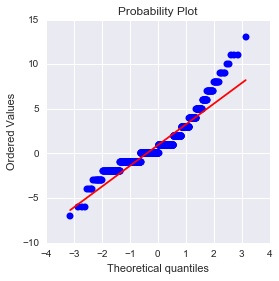

In [15]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
stats.probplot(resid, dist='norm', plot=ax)
plt.show()

With a score of 0.20, it's going to take a lot of work to get this model up to a level of accuracy comparable with, say, linear regression or state vector regression.

## Making a Pipeline

In [21]:
# Make a logistic regression model
knc = KNeighborsClassifier(n_neighbors=10)

# Make a ShuffleSplit object to split data into training/testing data sets randomly
cv = ShuffleSplit(n_splits=4, test_size=0.3, random_state=0)

# This will be our "model":
# a pipeline that scales our inputs first, 
# then passes them to the logistic regression model
clf = make_pipeline(preprocessing.StandardScaler(), knc)
cross_val_score(clf, X, make_spiffy(y), cv=cv)

array([ 0.22186752,  0.25219473,  0.2330407 ,  0.24102155])

Now let's use this cross-validation pipeline to see if adding a volume term improves this model at all.

## Adding Volume/Interaction Terms

Now that we have a more quantitative way to assess our models, let's start adding in some factors to see if we can improve our logistic regression model.

In [27]:
def load_data_with_volume():
    
    # Load the data from this file
    data_file = 'abalone/Dataset.data'
    
    # x data labels
    xnlabs = ['Sex']
    xqlabs = ['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']
    xlabs = xnlabs + xqlabs

    # y data labels
    ylabs = ['Rings']

    # Load data to dataframe
    df = pd.read_csv(data_file, header=None, sep=' ', names=xlabs+ylabs)
    
    # Filter zero values of height/length/diameter
    df = df[df['Height']>0.0]
    df = df[df['Length']>0.0]
    df = df[df['Diameter']>0.0]
    
    # -----------------------------
    
    # Add volume
    df['Volume'] = df['Height']*df['Length']*df['Diameter']
    xqlabs.append('Volume')
    
    
    # Add dimensions squared
    sq = lambda x : x*x
    df['Height2']   = df['Height'].apply(sq)
    df['Length2']   = df['Length'].apply(sq)
    df['Diameter2'] = df['Diameter'].apply(sq)
    xqlabs.append('Height2')
    xqlabs.append('Length2')
    xqlabs.append('Diameter2')
    
    
    # Add interactions
    df['Height-Length'] = df['Height']*df['Length']
    df['Length-Diameter'] = df['Length']*df['Diameter']
    df['Height-Diameter'] = df['Height']*df['Diameter']

    xqlabs.append('Height-Length')
    xqlabs.append('Length-Diameter')
    xqlabs.append('Height-Diameter')

    # Add dimensions cubed
    cube = lambda x : x*x*x
    df['Height3']   = df['Height'].apply(cube)
    df['Length3']   = df['Length'].apply(cube)
    df['Diameter3'] = df['Diameter'].apply(cube)
    xqlabs.append('Height3')
    xqlabs.append('Length3')
    xqlabs.append('Diameter3')

    # -----------------------------
    
    dummies = pd.get_dummies(df[xnlabs], prefix='Sex')
    
    dfdummies = df[xqlabs+ylabs].join(dummies)
    
    xqlabs = xqlabs + dummies.columns.tolist()
    
    return Bunch(data   = dfdummies[xqlabs],
                 target = df[ylabs],
                 feature_names = xqlabs,
                 target_names  = ylabs)


In [28]:
# Load the dataset
datasetV = load_data_with_volume()
XV = datasetV.data
yV = datasetV.target

## Using Volume in Pipeline

Next we'll use the volume term we added to the data loading function to create a K-Nearest Neighbor model with volume included.

In [29]:
# Make a logistic regression model
knc = KNeighborsClassifier(n_neighbors=10)

# Make a ShuffleSplit object to split data into training/testing data sets randomly
cv = ShuffleSplit(n_splits=4, test_size=0.3, random_state=0)

# This will be our "model":
# a pipeline that scales our inputs first, 
# then passes them to the logistic regression model
clf = make_pipeline(preprocessing.StandardScaler(), knc)
cross_val_score(clf, XV, make_spiffy(yV), cv=cv)

array([ 0.22585794,  0.24102155,  0.22825219,  0.23144453])